In [2]:

import numpy as np
import pandas as pd
from sklearn import datasets
import sys
sys.path.append("/workspaces/InterviewPrep/ML_algos")
from KNN import KNN
import matplotlib.pyplot as plt


iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df = df.sample(frac=1).reset_index(drop=True)

train = df.iloc[:100]
test = df.iloc[100:]

print(train.shape, test.shape)
print(train.head(), test.head())


X_train = train.drop('target', axis=1).values
y_train = train['target'].values
X_test = test.drop('target', axis=1).values
y_test = test['target'].values

(100, 5) (50, 5)
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                6.3               3.3                6.0               2.5   
1                5.0               2.0                3.5               1.0   
2                6.4               2.8                5.6               2.1   
3                5.6               2.8                4.9               2.0   
4                5.8               2.7                3.9               1.2   

   target  
0       2  
1       1  
2       2  
3       2  
4       1        sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                5.4               3.9                1.3               0.4   
101                5.7               2.6                3.5               1.0   
102                5.4               3.7                1.5               0.2   
103                5.5               2.4                3.8               1.1   
104                5.8         

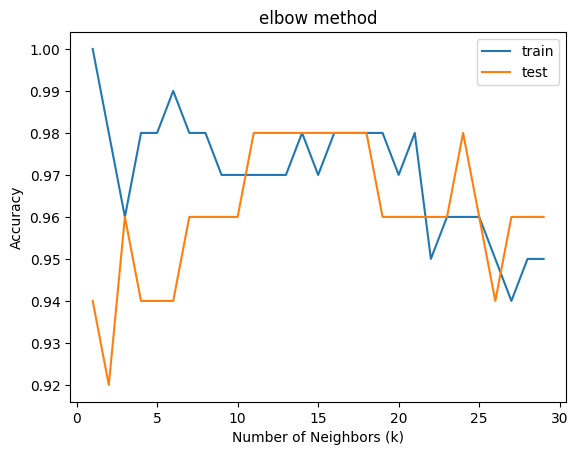

In [3]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

k_list = [i for i in range(1, 30)]

train_acc = []
test_acc = []

for k in k_list:
    knn = KNN(k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_acc.append(accuracy(y_train, train_pred))
    test_acc.append(accuracy(y_test, test_pred))

plt.plot(k_list, train_acc, label='train')
plt.plot(k_list, test_acc, label='test')
plt.legend() 
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("elbow method")
plt.show()
